In [2]:
# Celem analizy jest zweryfikowanie jak wielu klientów reprezentuje dane gospodarstwo domowe.
# Przedstawienie skumulowanej wartości liczbowej oraz procentowej oraz rozróżnienie wg płci.
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [3]:
# Wczytanie danych
customers = pd.read_csv('customers.csv', sep=";")

In [4]:
#Wyświetlenie wczytanej tabeli
customers.head(n=5)

,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [5]:
# Przefiltrowanie tabeli według gospodarstw domowych i unikatowych id klientów.
# Filtry pozwolą sprawdzić jak wiele klientów reprezentuje każde z gospodarstw domowych
countedcustomers= customers.groupby('householdid').customerid.nunique()
countedcustomers= countedcustomers.reset_index(name='AccountsInHousehold')
countedcustomers.head(n=5)

,householdid,AccountsInHousehold
0,18111489,1
1,18111580,1
2,18111642,1
3,18111668,1
4,18111771,1


In [6]:
# Zsumowanie gospodarstw domowych według liczby posiadanych klientów
expectedtab=countedcustomers.groupby(['AccountsInHousehold']).size().reset_index(name='NumberOfHouseholds')
expectedtab.head(n=10)

,AccountsInHousehold,NumberOfHouseholds
0,1,134293
1,2,16039
2,3,3677
3,4,1221
4,5,523
5,6,244
6,7,110
7,8,63
8,9,28
9,10,18


In [7]:
# Dodanie kolumny do istniejącej tabeli, obrazującej skumulowaną wartoścć liczbową oraz procentową na podstawie wyników z poprzedniej tabeli
expectedtab['CumulativeNumber'] = expectedtab.NumberOfHouseholds.cumsum()
expectedtab.head(n=10)

,AccountsInHousehold,NumberOfHouseholds,CumulativeNumber
0,1,134293,134293
1,2,16039,150332
2,3,3677,154009
3,4,1221,155230
4,5,523,155753
5,6,244,155997
6,7,110,156107
7,8,63,156170
8,9,28,156198
9,10,18,156216


In [8]:
# Obliczenie skumulowanej wartości procentowej
expectedtab['CumulativePercent'] = 100*expectedtab.CumulativeNumber/expectedtab.NumberOfHouseholds.sum()
expectedtab

,AccountsInHousehold,NumberOfHouseholds,CumulativeNumber,CumulativePercent
0,1,134293,134293,85.943120
1,2,16039,150332,96.207554
2,3,3677,154009,98.560714
3,4,1221,155230,99.342114
4,5,523,155753,99.676817
5,6,244,155997,99.832969
6,7,110,156107,99.903365
7,8,63,156170,99.943683
8,9,28,156198,99.961602
9,10,18,156216,99.973121


In [10]:
# Kolejnym krokiem jest przedstawienie zróżnicowania wg płci w calym zbiorze danych
customers.head(n=10)

,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM
5,174257,53949983,F,TRISHA
6,173506,53476818,M,DANTE
7,51886,20359142,F,ANTHONY
8,143249,20287377,F,NANCY
9,174650,53958894,M,GREG


In [14]:
# Filtrowanie tabeli wg kolumny Gender
gendersfrequency=customers.groupby(['gender']).size().reset_index(name='Frequency')
# Nadpisanie nazwy kolumny
gendersfrequency = gendersfrequency.rename(columns = {'gender':'Gender'})
gendersfrequency

,Gender,Frequency
0,F,76874
1,M,96481


In [18]:
gendersfrequency['CumulativePercent'] = 100*gendersfrequency.Frequency/gendersfrequency.Frequency.sum()
gendersfrequency

,Gender,Frequency,CumulativePercent
0,F,76874,44.344842
1,M,96481,55.655158


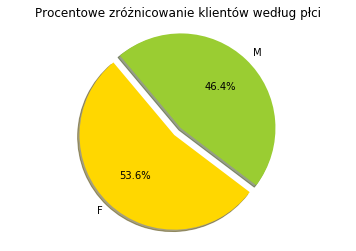

In [52]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = gendersfrequency['Gender']
values = gendersfrequency['CumulativePercent']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) 

plt.title('Procentowe zróżnicowanie klientów według płci')
    
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=130)
 
plt.axis('equal')
plt.show()